In [ ]:

try:

    import tensorflow as tf
    import cv2
    import os
    import pickle
    import numpy as np
    import matplotlib.pyplot as plt
    
    print("Library Loaded Successfully ..........")
except:
    print("Library not Found ! ")


class MasterImage(object):

    def __init__(self,PATH='', IMAGE_SIZE = 64):
        self.PATH = PATH
        self.IMAGE_SIZE = IMAGE_SIZE

        self.image_data = []
        self.x_data = []
        self.y_data = []
        self.CATEGORIES = []

        # This will get List of categories
        self.list_categories = []

    def get_categories(self):
        for path in os.listdir(self.PATH):
            if '.DS_Store' in path:
                pass
            else:
                self.list_categories.append(path)
        print("Found Categories ",self.list_categories,'\n')
        return self.list_categories

    def Process_Image(self):
        try:
            """
            Return Numpy array of image
            :return: X_Data, Y_Data
            """
            self.CATEGORIES = self.get_categories()
            for categories in self.CATEGORIES:                                                  # Iterate over categories

                train_folder_path = os.path.join(self.PATH, categories)                         # Folder Path
                class_index = self.CATEGORIES.index(categories)                                 # this will get index for classification

                for img in os.listdir(train_folder_path):                                       # This will iterate in the Folder
                    new_path = os.path.join(train_folder_path, img)                             # image Path

                    try:        # if any image is corrupted
                        image_data_temp = cv2.imread(new_path,cv2.IMREAD_GRAYSCALE)                 # Read Image as numbers
                        image_temp_resize = cv2.resize(image_data_temp,(self.IMAGE_SIZE,self.IMAGE_SIZE))
                        self.image_data.append([image_temp_resize,class_index])
                    except:
                        pass

            data = np.asanyarray(self.image_data)

            # Iterate over the Data
            for x in data:
                self.x_data.append(x[0])        # Get the X_Data
                self.y_data.append(x[1])        # get the label

            X_Data = np.asarray(self.x_data) / (255.0)      # Normalize Data
            Y_Data = np.asarray(self.y_data)

            # reshape x_Data

            X_Data = X_Data.reshape(-1, self.IMAGE_SIZE, self.IMAGE_SIZE, 1)

            return X_Data, Y_Data
        except:
            print("Failed to run Function Process Image ")

    def pickle_image(self):

        """
        :return: None Creates a Pickle Object of DataSet
        """
        # Call the Function and Get the Data
        X_Data,Y_Data = self.Process_Image()

        # Write the Entire Data into a Pickle File
        pickle_out = open('X_Data','wb')
        pickle.dump(X_Data, pickle_out)
        pickle_out.close()

        # Write the Y Label Data
        pickle_out = open('Y_Data', 'wb')
        pickle.dump(Y_Data, pickle_out)
        pickle_out.close()

        print("Pickled Image Successfully ")
        return X_Data,Y_Data

    def load_dataset(self):

        try:
            # Read the Data from Pickle Object
            X_Temp = open('X_Data','rb')
            X_Data = pickle.load(X_Temp)

            Y_Temp = open('Y_Data','rb')
            Y_Data = pickle.load(Y_Temp)

            print('Reading Dataset from PIckle Object')

            return X_Data,Y_Data

        except:
            print('Could not Found Pickle File ')
            print('Loading File and Dataset  ..........')

            X_Data,Y_Data = self.pickle_image()
            return X_Data,Y_Data


if __name__ == "__main__":
    path = "/content/drive/MyDrive/dataset/train"
    a = MasterImage(PATH=path,
                    IMAGE_SIZE=64)

    X_Data,Y_Data = a.load_dataset()
    print(X_Data.shape)



Library Loaded Successfully ..........
Could not Found Pickle File 
Loading File and Dataset  ..........
Found Categories  ['neutral', 'angry', 'fear', 'happy', 'surprise', 'disgust', 'sad'] 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:195: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Pickled Image Successfully 
(28719, 64, 64, 1)


Vgg19

Total number of symbols:  7
Number of training images:  22975
Number of testing images:  5744
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                 

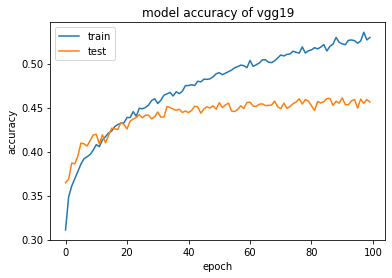

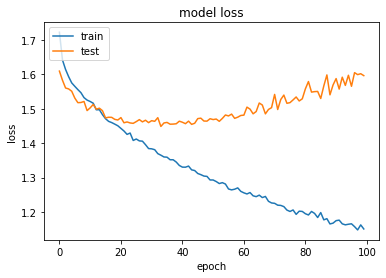

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras

import os
import cv2

train_dir = "/content/drive/MyDrive/dataset/train"


def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(uniq_labels):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)


uniq_labels = sorted(os.listdir(train_dir))
images, labels = load_images(directory=train_dir)

# if uniq_labels == sorted(os.listdir(eval_dir)):
#     X_eval, y_eval = load_images(directory = eval_dir)


X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, stratify=labels)

n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

print("Total number of symbols: ", n)
print("Number of training images: ", train_n)
print("Number of testing images: ", test_n)

X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

classifier_vgg19 = VGG19(input_shape=(64, 64, 3),
                         include_top=False, weights='imagenet',pooling=None,classes=7,classifier_activation="softmax",)


# don't train existing weights for vgg16
for layer in classifier_vgg19.layers:
    layer.trainable = False


classifier1 = classifier_vgg19.output  # head mode
classifier1 = Flatten()(classifier1)  # adding layer of flatten
classifier1 = Dense(units=256, activation='relu')(classifier1)
classifier1 = Dropout(0.6)(classifier1)
classifier1 = Dense(units=7, activation='softmax')(classifier1)

model = Model(inputs=classifier_vgg19.input, outputs=classifier1)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])


model.summary()


history = model.fit(X_train, y_train, epochs=100,
                    batch_size=50, validation_data=(X_test, y_test))
# Saving the model of vgg19
model.save('model_vgg19.h5')

# vgg19


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy of vgg19')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Resnet50

Total number of symbols:  7
Number of training images:  22975
Number of testing images:  5744
94781440/94765736 [==============================] - 2s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


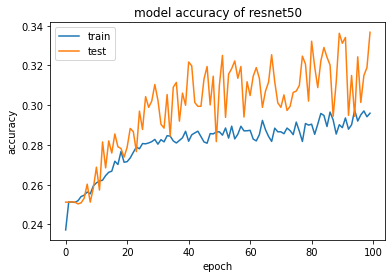

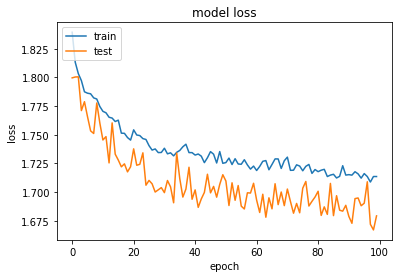

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras

import os
import cv2

train_dir = "/content/drive/MyDrive/dataset/train"


def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(uniq_labels):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)


uniq_labels = sorted(os.listdir(train_dir))
images, labels = load_images(directory=train_dir)

# if uniq_labels == sorted(os.listdir(eval_dir)):
#     X_eval, y_eval = load_images(directory = eval_dir)


X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, stratify=labels)

n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

print("Total number of symbols: ", n)
print("Number of training images: ", train_n)
print("Number of testing images: ", test_n)

X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

classifier_resnet50 = ResNet50(input_shape=(64, 64, 3),
                         include_top=False, weights='imagenet',pooling=None,classes=7,classifier_activation="softmax",)


# don't train existing weights for vgg16
for layer in classifier_resnet50.layers:
    layer.trainable = False


classifier1 = classifier_resnet50.output  # head mode
classifier1 = Flatten()(classifier1)  # adding layer of flatten
classifier1 = Dense(units=256, activation='relu')(classifier1)
classifier1 = Dropout(0.6)(classifier1)
classifier1 = Dense(units=7, activation='softmax')(classifier1)

model = Model(inputs=classifier_resnet50.input, outputs=classifier1)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])


model.summary()


history = model.fit(X_train, y_train, epochs=100,
                    batch_size=50, validation_data=(X_test, y_test))
# Saving the model of resnet50
model.save('model_resnet50.h5')

# vgg16


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy of resnet50')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout,Conv2D, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras

import os
import cv2

train_dir = "/content/drive/MyDrive/dataset/train"


def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(uniq_labels):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (224, 224))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)


uniq_labels = sorted(os.listdir(train_dir))
images, labels = load_images(directory=train_dir)

# if uniq_labels == sorted(os.listdir(eval_dir)):
#     X_eval, y_eval = load_images(directory = eval_dir)


X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, stratify=labels)

n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

print("Total number of symbols: ", n)
print("Number of training images: ", train_n)
print("Number of testing images: ", test_n)

X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

classifier_vgg16 = VGG16(input_shape=(224, 224, 3),
                         include_top=False, weights='imagenet')


# don't train existing weights for vgg16
for layer in classifier_vgg16.layers:
    layer.trainable = False


# classifier1 = classifier_vgg16.output  # head mode
# classifier1 = Flatten()(classifier1)  # adding layer of flatten
# classifier1 = Dense(units=256, activation='relu')(classifier1)
# classifier1 = Dropout(0.6)(classifier1)
# classifier1 = Dense(units=7, activation='softmax')(classifier1)

model=Sequential([
      classifier_vgg16,
      Flatten(),
      Dense(units=256, activation='relu'),
      Flatten(units=256, activation='relu'),
      Flatten(units=7, activation='relu'),

])

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])


model.summary()


history = model.fit(X_train, y_train, epochs=1,
                    batch_size=50, validation_data=(X_test, y_test))
# Saving the model of vgg16
model.save('model_vgg16.h5')

# vgg16


# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy of vgg16')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Total number of symbols:  7
Number of training images:  22975
Number of testing images:  5744


## **FYP** **BACKEND** *italicized text*

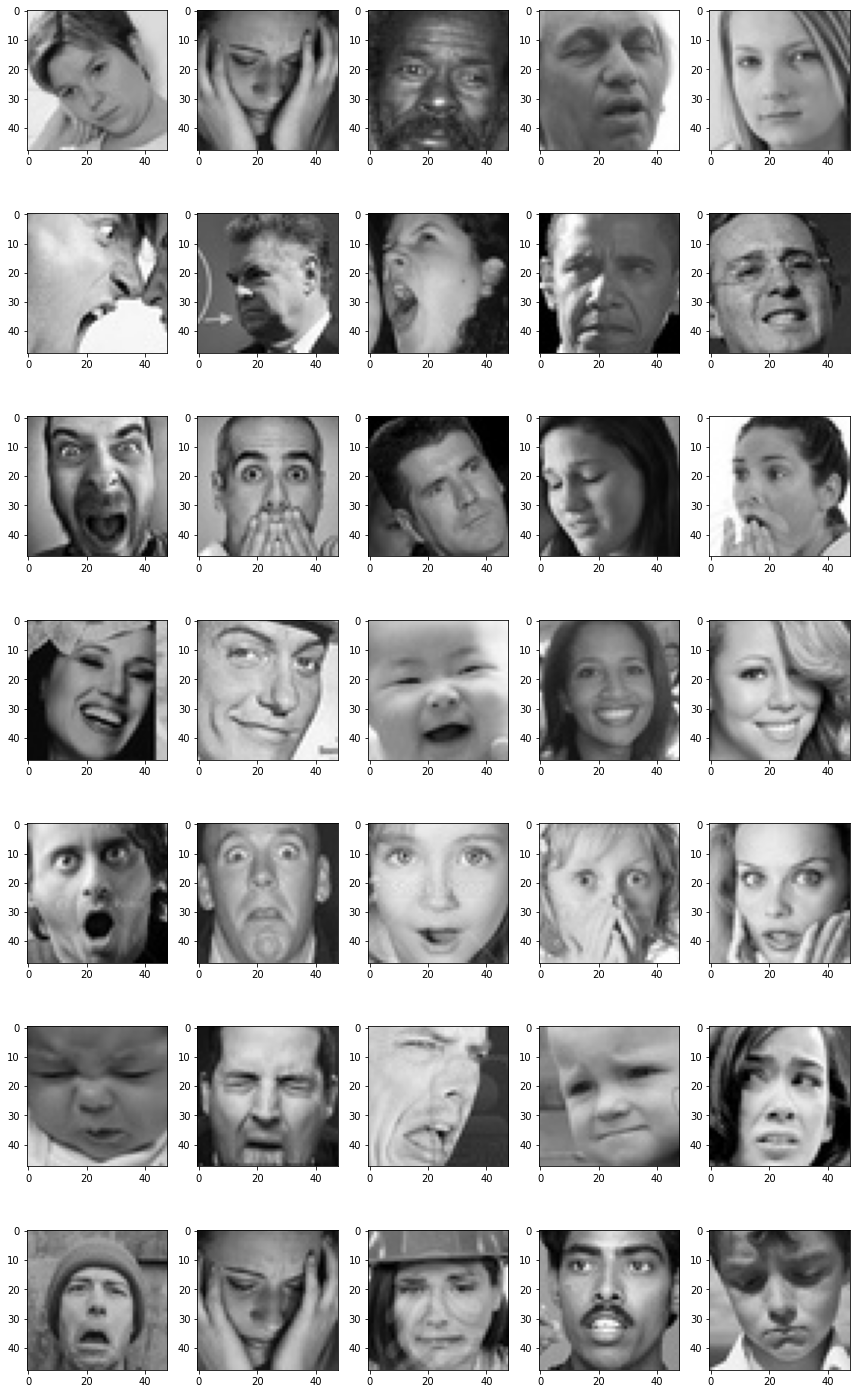

In [ ]:
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "/content/drive/MyDrive/dataset/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img)

plt.tight_layout()
plt.show()

In [ ]:
for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")

4965 neutral images
4005 angry images
4097 fear images
7215 happy images
3171 surprise images
436 disgust images
4830 sad images


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(224,224)
                                                    )
validation_generator = datagen_validation.flow_from_directory('/content/drive/MyDrive/DATASET/test',
                                                    target_size=(224,224)
                                                    )


Found 28719 images belonging to 7 classes.
Found 7188 images belonging to 7 classes.


In [ ]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Input, Lambda, Dense, Flatten, Dropout,Conv2D, MaxPool2D
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import keras




classifier_vgg16 = VGG16(input_shape=(224, 224, 1),
                         include_top=False, weights='imagenet')


# don't train the front 13 layers, train only last two layers
classifier_vgg16.trainable= False




model=Sequential([
      classifier_vgg16,
      Flatten(),
      Dense(units=256, activation='relu'),
      Dense(units=256, activation='relu'),
      Dense(units=7, activation='softmax'),

])


model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])




58900480/58889256 [==============================] - 0s 0us/step


In [ ]:

epochs = 100

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=100,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = 10
                                )
model.save('vgg16model.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
100/100 [==============================] - 864s 9s/step - loss: 4.9601 - accuracy: 0.3116 - val_loss: 1.7912 - val_accuracy: 0.3688
Epoch 2/100
100/100 [==============================] - 798s 8s/step - loss: 1.5900 - accuracy: 0.4275 - val_loss: 1.5450 - val_accuracy: 0.4250
Epoch 3/100
100/100 [==============================] - 708s 7s/step - loss: 1.5294 - accuracy: 0.4384 - val_loss: 1.5545 - val_accuracy: 0.3781
Epoch 4/100
100/100 [==============================] - 644s 6s/step - loss: 1.4259 - accuracy: 0.4647 - val_loss: 1.5327 - val_accuracy: 0.4344
Epoch 5/100
100/100 [==============================] - 577s 6s/step - loss: 1.4116 - accuracy: 0.4756 - val_loss: 1.4463 - val_accuracy: 0.4594
Epoch 6/100
100/100 [==============================] - 538s 5s/step - loss: 1.4293 - accuracy: 0.4622 - val_loss: 1.4814 - val_accuracy: 0.4531
Epoch 7/100
100/100 [==============================] - 502s 5s/step - loss: 1.3882 - accuracy: 0.4709 - val_loss: 1.5607 - val_accuracy:

In [ ]:
import tensorflow as tf
model_new=tf.keras.models.load_model("/content/drive/MyDrive/vgg16model.h5")

In [ ]:
import matplotlib.pyplot as plt
history=model_new
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy of VGG-16')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import tensorflow as tf
model=tf.keras.models.load_model("/content/drive/MyDrive/vgg16model.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.experimental_new_converter = True
tflite_model = converter.convert()
open("vgg16.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp5mxdymh_/assets


INFO:tensorflow:Assets written to: /tmp/tmp5mxdymh_/assets


84829680

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
